# Name:Prajwal KV

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [144]:
url = "http://bit.ly/w-data"
df=pd.read_csv(url)
print(df.shape,'\n')
print(df.info(),'\n')
print(df.describe())

(25, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None 

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


 # Dataset has 25 rows and 2 columns

In [145]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


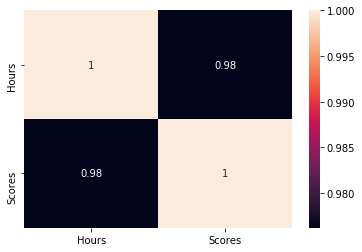

In [6]:
sns.heatmap(df.corr(),annot=True)

# EDA


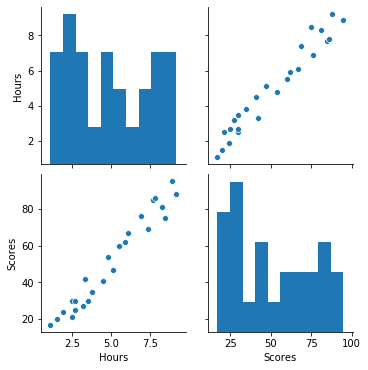

In [7]:
sns.pairplot(data=df)

#  There is no Duplicate values in the Dataset

In [8]:
print(df.duplicated().sum())

0


# No Null Values in Both columns

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

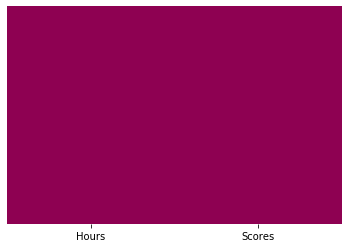

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='PiYG')#No null values

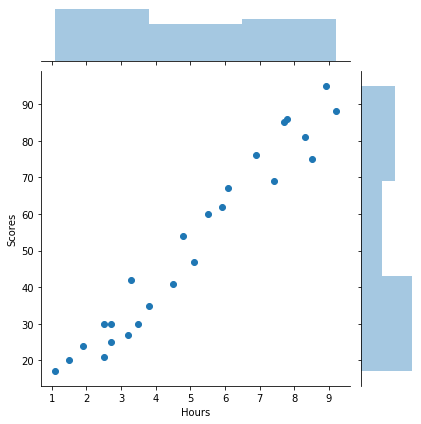

In [13]:
sns.jointplot(x='Hours',y='Scores',data=df)

[Text(0.5, 1.0, 'Hours VS Scores')]

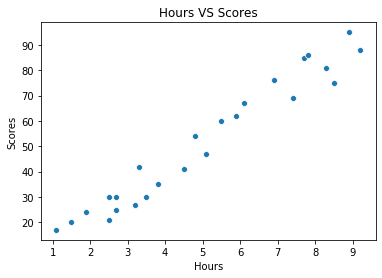

In [15]:
ax=sns.scatterplot(x='Hours',y='Scores',data=df)
ax.set(title="Hours VS Scores")

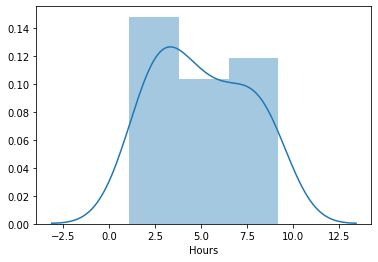

In [42]:
sns.distplot(df['Hours'])

#  Preparing the data
# The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [38]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [40]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [41]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [43]:
print(regressor.coef_)

[9.78618333]


In [44]:
print(regressor.intercept_)

2.395838179248173


In [46]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[5.1]
 [1.5]
 [5.9]
 [3.3]
 [3.2]
 [4.8]
 [2.7]]


# Linear Relation between Hours(predicted) and Scores(predicted)

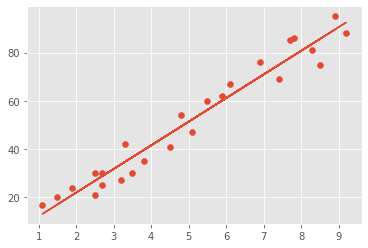

In [147]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,47,52.305373
1,20,17.075113
2,62,60.134320
3,42,34.690243
4,27,33.711625
5,54,49.369518
6,25,28.818533


In [57]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91803396017104


In [69]:
own_pred

array([92.91803396])

In [59]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.652333835178401


In [65]:
print('metrics.mean_squared_error',metrics.mean_squared_error(y_test,y_pred).mean())

metrics.mean_squared_error 24.954817191378645


In [66]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred).mean())

4.9954796758047815

# Now Solving the Univariate Regression Task without using Scikit learn

In [148]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [149]:
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


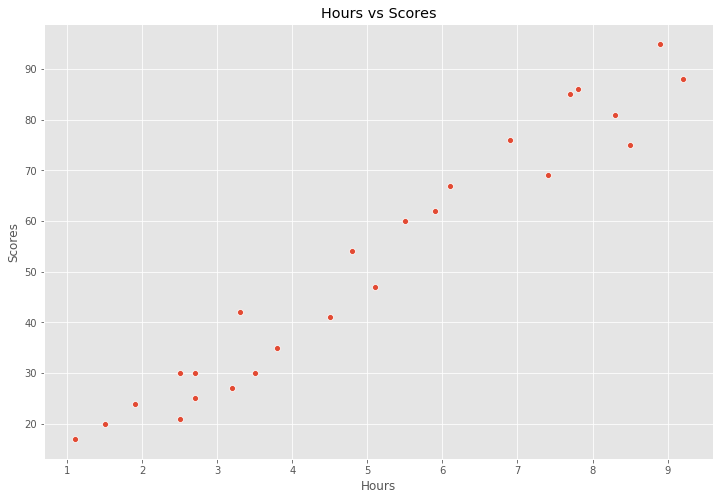

In [150]:
ax = sns.scatterplot(x='Hours', y='Scores', data=data)
ax.set_title("Hours vs Scores");

# Defining Cost Function

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [87]:
def cost_function(X1, y1, theta):
    m = len(y1)
    y_pred1 = X1.dot(theta)
    error = (y_pred1 - y1) ** 2
    
    return 1 / (2 * m) * np.sum(error)
cost_function(X1, y1, theta)

1632.02

In [89]:
data.Hours.values.size

25

In [90]:
data.Hours.values

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [117]:
len(data.Hours)

25

In [91]:
m = data.Hours.values.size
# add another dimension to accomodate the intercept term and set it to all ones
X1 = np.append(np.ones((m, 1)), data.Hours.values.reshape(m, 1), axis=1)
y1 = data.Scores.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_function(X1,y1, theta)

1632.02

In [92]:
cost_function(X1,y1,theta)

1632.02

### Task 5: Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [93]:
def gradient_descent(X1, y1, theta, alpha, iterations): 
    m = len(y1)
    costs = []
    for i in range(iterations):
        y_pred1 = X1.dot(theta)
        error = np.dot(X1.transpose(), (y_pred1 - y1))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X1, y1, theta))
        
    return theta, costs

In [94]:
theta, costs = gradient_descent(X1, y1, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = 2.35 + 9.8x1


# Hypothesis, h(x)=theta_0+theta_1*X
# theta_0=2.35
# theta_1=9.8

In [141]:
costs[9]

15.227051309361213

### Task 6: Visualising the Cost Function $J(\theta)$

In [96]:
from mpl_toolkits.mplot3d import Axes3D#-3.79+1.18

In [138]:
theta_0 = np.linspace(1,10,100)
theta_1 = np.linspace(1,15,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X1, y1, t)

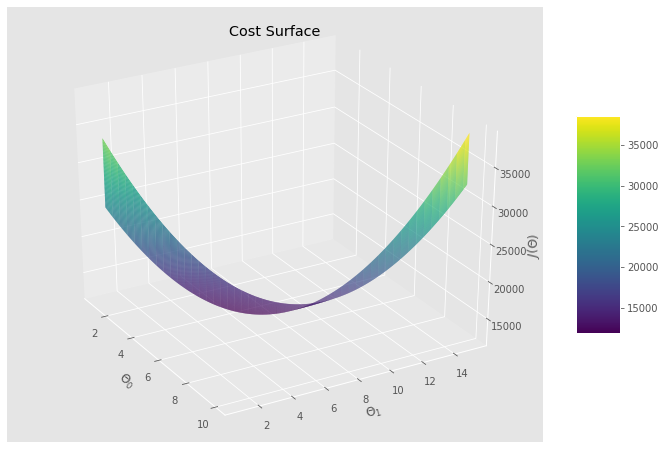

In [139]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

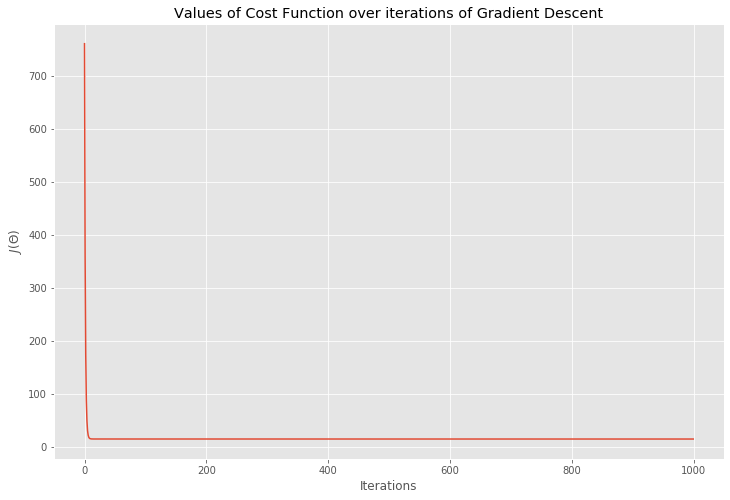

In [142]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

In [100]:
theta.shape

(2, 1)

In [101]:
theta

array([[2.35317894],
       [9.79686728]])

In [102]:
np.squeeze(theta)

array([2.35317894, 9.79686728])

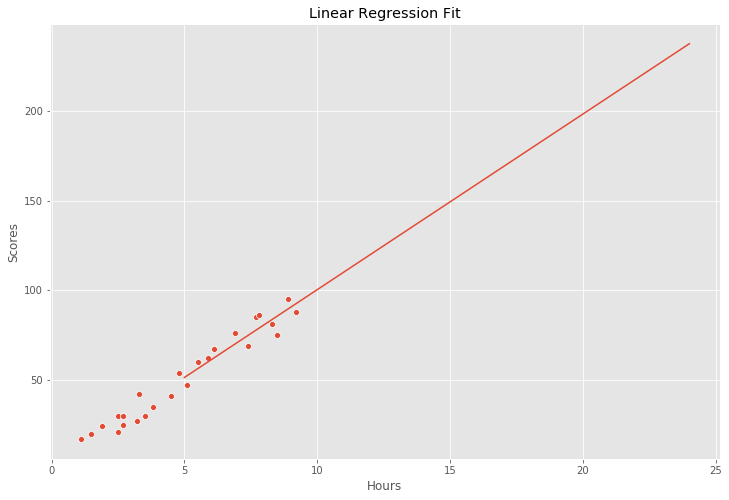

In [103]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Hours", y= "Scores", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Linear Regression Fit");

In [104]:
def predict(x1, theta):
    y_pred1 = np.dot(theta.transpose(), x1)
    return y_pred1

In [113]:
y_pred_1 = predict(np.array([1,8.5]),theta) 
print("For 8.5 Hours,Student would score around " + str(round(y_pred_1, 0)),'%')

For 8.5 Hours,Student would score around 86.0 %


In [116]:
y_pred_2 = predict(np.array([1, 4.7]), theta)
print("For 4.7 Hours,Student would score around " + str(round(y_pred_2, 0)),'%')

For 4.7 Hours,Student would score around 48.0 %
